In [1]:
from plot_vectors import plotVectors
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ordevoir-dark")

# Аффинное преобразование

Создадим исходный набор двумерных векторов, заключенных в квадрат:

In [2]:
xs = np.arange(-1, 1.1, 0.1)

origin_vectors = np.array([[i, j] for i in xs for j in xs])
origin_vectors.shape

(441, 2)

Произведем аффинное преобразование производя последовательно линейное преобразование $Φ$ и перемещение на вектор $\mathbf{a}$. В качестве линейного преобразования, произведем поворот.

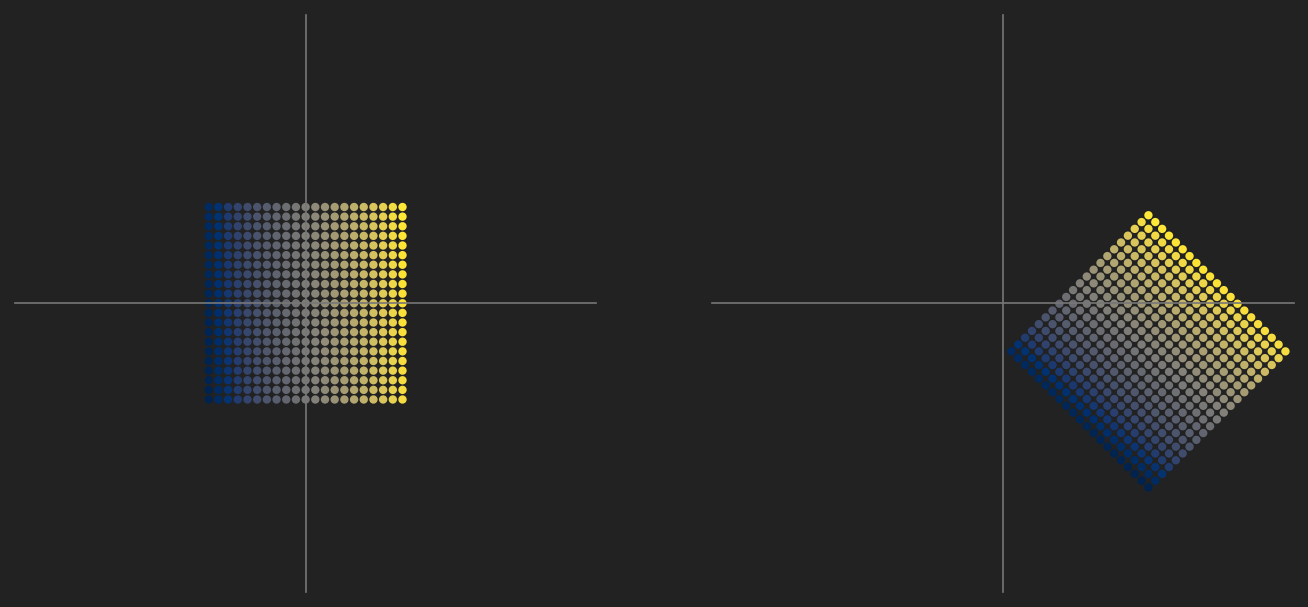

In [3]:
from numpy import pi, cos, sin

affine_v = np.empty_like(origin_vectors)

# сначала произведем линейное преобразование (поворот)
degree = 45
angle = pi * degree / 180
rotate = np.array([ [cos(angle), -sin(angle)], 
                    [sin(angle),  cos(angle)]])

for i in range(origin_vectors.shape[0]):
    affine_v[i] = np.matmul(rotate, origin_vectors[i])

# затем перемещение
shift = np.array([1.5, -0.5])      # вектор перемещения
affine_v = affine_v + shift         

plotVectors(origin_vectors, affine_v)

# Переход к однородным координатам

(441, 2)


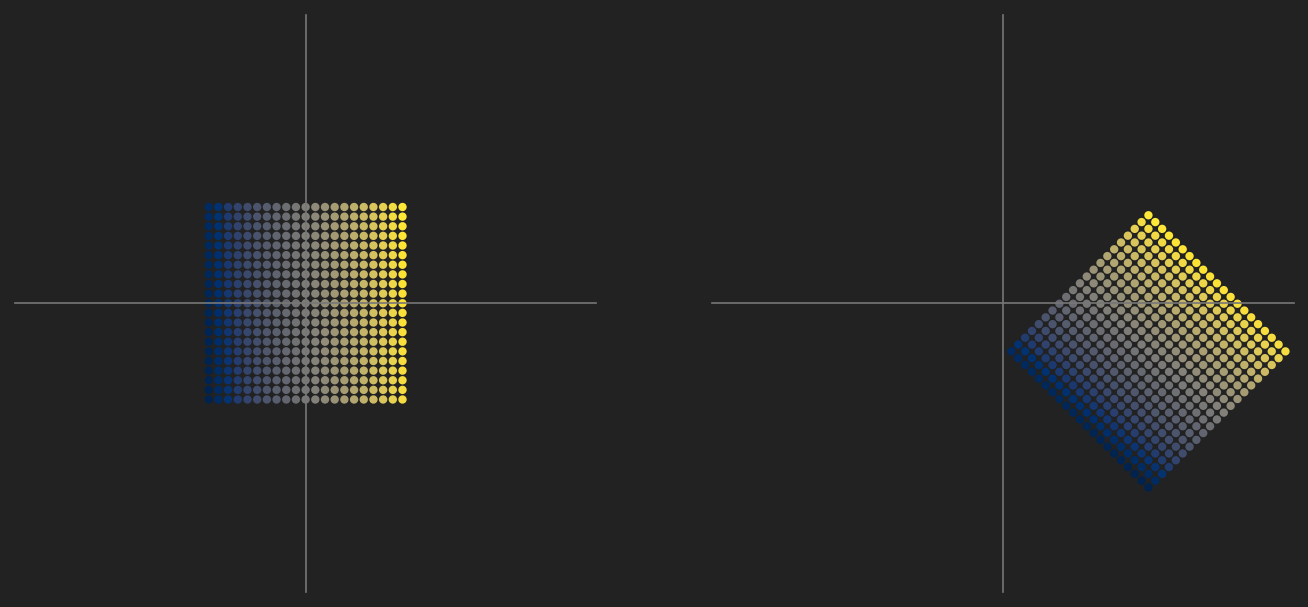

In [4]:
# получим в origin_hom однородные вектора из origin_vectors:
s = origin_vectors.shape
print(s)
origin_hom = np.ones(shape=(s[0], s[1]+1))
for i in range(s[0]):
    origin_hom[i, 0] = origin_vectors[i, 0]
    origin_hom[i, 1] = origin_vectors[i, 1]

# матрица афинного преобразования
rotate = np.array([ [cos(angle), -sin(angle),  1.5], 
                    [sin(angle),  cos(angle), -0.5],
                    [         0,          0,   1.0] ])

# производим преобразование векторов
vectors_hom = np.empty(shape=origin_hom.shape)
for i in range(s[0]):
    vectors_hom[i] = np.matmul(rotate, origin_hom[i])

# переходим обратно к исходному представлению векторов
vectors_hom = vectors_hom.transpose()
s = vectors_hom.shape
vectors = np.empty(shape=(s[0]-1, s[1]))
vectors = vectors_hom[:-1]
vectors = vectors.transpose()

plotVectors(origin_vectors, vectors)